# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv("dataset_clustering.csv")
print(df.head())

   Unit_Price  Discount  Category      PCA1      PCA2  Cluster
0    0.011128  0.333333         2 -0.270456  1.040086        0
1    0.009466  0.000000         1  0.433919 -0.420048        1
2    0.010189  0.000000         2 -0.166095 -0.559817        0
3    0.010622  0.000000         1  0.541914 -0.416996        1
4    0.004697  0.333333         3 -1.538688  0.881431        2


In [10]:
encoder = LabelEncoder()
categorical_cols = ["Category"]
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

y = encoder.fit_transform(df["Cluster"])

X = df.drop(columns=["Cluster"])

print(X_train.dtypes)

Unit_Price    float64
Discount      float64
Category        int64
PCA1          float64
PCA2          float64
dtype: object


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
X = df.drop(columns=["Cluster"])
y = df["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Ukuran X_test: {X_test.shape}, y_test: {y_test.shape}")

Ukuran X_train: (6040, 5), y_train: (6040,)
Ukuran X_test: (1511, 5), y_test: (1511,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [13]:
# SVM
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.
* Random Forest: alasan untuk menggunakan algoritma ini karena lebih akurat dan juga stabil dibanding one decision tree, dapat mengurangi overfitting karena menggunakan seperti banyak pohon yang bercabang, serta dapat juga digunakan untuk menangani data yang kompleks dengan adanya fitur numerik dan kategorikal.
* SVM: alasan untuk menggunakan SVM adalah SVM efektif untuk data yang berdimensi tinggi, dan dapat menangani data non-linear
* 2 Algoritma ini cocok untuk dataset yang digunakan saat ini

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [14]:
# Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       416
           1       1.00      1.00      1.00       656
           2       1.00      1.00      1.00       439

    accuracy                           1.00      1511
   macro avg       1.00      1.00      1.00      1511
weighted avg       1.00      1.00      1.00      1511



In [15]:
#SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy SVM: {accuracy_svm:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy SVM: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       416
           1       1.00      1.00      1.00       656
           2       1.00      1.00      1.00       439

    accuracy                           1.00      1511
   macro avg       1.00      1.00      1.00      1511
weighted avg       1.00      1.00      1.00      1511



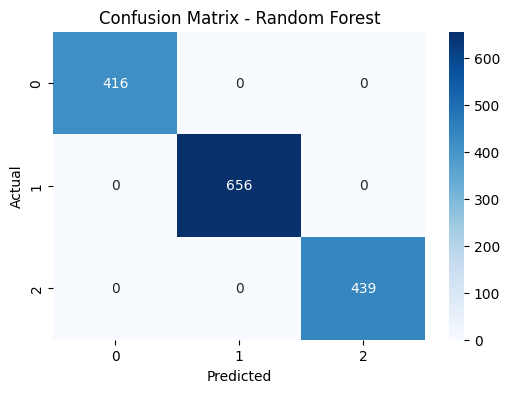

In [16]:
#Random Forest (Confussion Metrix)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

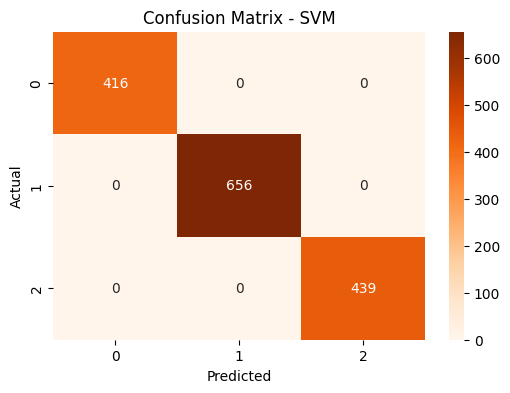

In [17]:
# SVM (Confussion Metrix)
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Oranges", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

# 1. Perbandingan akurasi dan evaluasi metrix pada random forest dan SVM
Berdasarkan hasil evaluasi, baik Random Forest maupun SVM menghasilkan akurasi 100% pada dataset yang digunakan (dikarenakan dataset yang dihasilkan dari clustering tidak terlalu besar dan sudah sangat bersih). Hal ini dapat dilihat dari hasil evaluasi yang menunjukkan nilai precision, recall, dan F1-score sebesar 1.00 untuk setiap kelas. Selain itu, confusion matrix dari kedua model juga menunjukkan bahwa semua prediksi sesuai dengan label aslinya.

# 2. Kemungkinan adanya kelemahan dalam model
Di dalam kedua model tersebut, adanya kemungkinan terjadi overfitting (terlalu menghafal) dengan training data dan tidak diuji dalam kondisi yang lebih bervariasi dan juga kecil (hanya 426 baris dari 10.000 data setelah filtering dan cleaning), sehingga model tersebut dapat mengenali pola nya.

# 3. Rekomendasi tindakan lanjutan
* Menambah jumlah dataset: dengan adanya penambahan data, model nantinya dapat belajar lebih banyak variasi pola sehingga nantinya mengurangi kemungkinan overfitting.
* Menguji model dengan dataset yang lebih luas: agar nanti hasil evaluasi lebih akurat, model nantinya juga bisa diuji dengan dataset dari sumber yang berbeda sesuai dengan kondisi dunia nyata.